In [1]:
import os
import cv2
import cv2 as cv
import matplotlib.pyplot as plt
import sys
import imutils
import numpy as np
from scipy.ndimage import interpolation as inter

In [198]:
def imshow(img):
    cv.imshow('image', img)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [199]:
def correct_skew(image, delta=1, limit=5):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2)
        return histogram, score

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
              borderMode=cv2.BORDER_REPLICATE)

    return best_angle, rotated

In [200]:
image = cv.imread('315.jpg')
image = imutils.resize(image, height=500)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
gray_image = ~gray_image
gray_blur = cv.GaussianBlur(gray_image, (5,5), 0)

In [201]:
images = ['313','315','318','320','322','326','327']
images = [i+'.jpg' for i in images]
originals = [cv.imread(i) for i in images]
original_shapes = [i.shape for i in originals]
ratios = [i[0]/500 for i in original_shapes]
images = [imutils.resize(i, height=500) for i in originals]
# x_ratio = [original_shapes[i][1]/v.shape[1] for i,v in enumerate(images)]
# images = [cv.imread(i) for i in images]
gray_images = [~cv.cvtColor(i, cv.COLOR_BGR2GRAY) for i in images]
gray_blurs = [cv.GaussianBlur(i, (5,5), 0) for i in gray_images]
edges = [cv.Canny(i, 50,200) for i in gray_blurs]
print(ratios)
# for i in edges:
#     imshow(i)

[6.968, 6.968, 6.968, 6.968, 6.968, 6.968, 6.968]


In [202]:
rows = [np.sum(i, axis=1) // 255 for i in edges]
cols = [np.sum(i, axis=0) // 255 for i in edges]
np.nonzero(rows[0])[0][0]
tops = [np.nonzero(i)[0][0] for i in rows]
bottoms = [np.nonzero(i)[0][-1] for i in rows]
lefts = [np.nonzero(i)[0][0] for i in cols]
rights = [np.nonzero(i)[0][-1] for i in cols]

In [228]:
for i in range(len(images)-0):
    x = images[i].copy()
    l = ((rights[i]-lefts[i])*3)//5
    t = ((bottoms[i]-tops[i])*3)//5
    r = rights[i]
    b = bottoms[i]-35
    t = bottoms[i]-60
    b = t
    t = b-25
    b = t
    t = b-10
    b = t
    t = b-30
    b = t
    t = b-20
    b = t
    t = b-25
    print(l,t,r,b)
    cv.rectangle(x, (l,t), (r, b), (0,0,255), 2)

#     cv.rectangle(x, ((rights[i]-lefts[i])*3//5, (bottoms[i]-tops[i])*3//5), (rights[i], bottoms[i]-20), (0,0,255), 2)
    imshow(x)

187 279 332 304
187 278 331 303
187 279 331 304
187 279 331 304
185 273 328 298
187 278 331 303
187 279 330 304


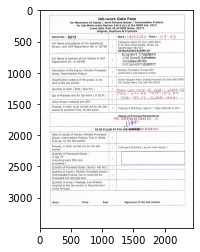

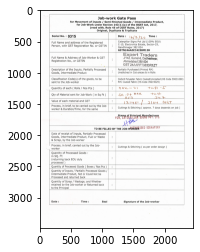

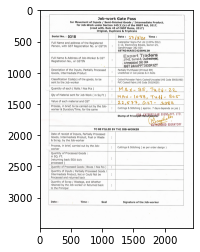

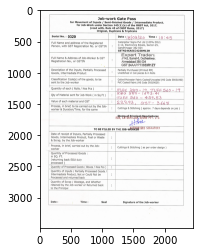

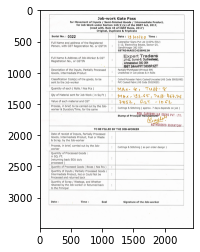

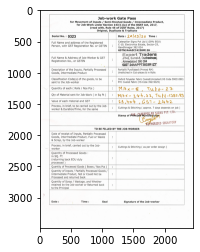

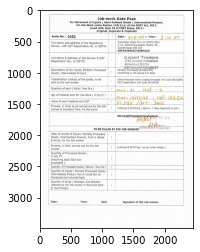

In [222]:
for i in range(len(images)):
    x = originals[i].copy()
    l = int(l*ratios[i])
    r = int(r*ratios[i])
    t = int(t*ratios[i])
    b = int(b*ratios[i])
    cv.rectangle(x, (l,t), (r,b), (0,0,255), 2)
    plt.imshow(x, cmap='gray')
    plt.show()

In [135]:
a = cv.imread('315.jpg')
a = cv.cvtColor(a, cv.COLOR_BGR2GRAY)
a = cv.GaussianBlur(a, (5,5), 0)
a = cv.Canny(a, 50,200)
print(ratios)

[6.968, 6.968, 6.968, 6.968, 6.968, 6.968, 6.968]


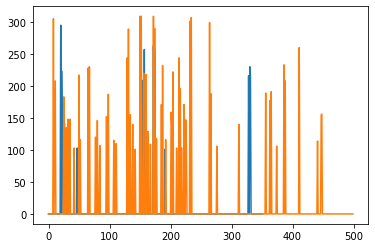

In [29]:
edged.shape
row = np.sum(edged, axis=1) // 255
col = np.sum(edged, axis=0) // 255
row_thresh = list(map(lambda x: x if x>100 else 0, row))
col_thresh = list(map(lambda x: x if x>100 else 0, col))
plt.plot(col_thresh)
plt.plot(row_thresh)
col_thresh = [i for i in range(len(col_thresh)) if col_thresh[i]>150]
row_thresh = [i for i in range(len(row_thresh)) if row_thresh[i]>150]

In [9]:
t = edged[:, 200:300]
row = np.sum(t, axis=1) // 255
row_thresh = list(map(lambda x: x if x==100 else 0, row))
row_index = []
for i in range(len(row_thresh)):
    if row_thresh[i]: row_index.append(i)
row_index

[10, 12, 54, 99, 151, 233, 235, 307, 323, 325, 357, 364, 366, 387, 412]

In [10]:
lines = image.copy()
for i in row_index:
    cv.line(lines, (0,i), (350,i), (255,0,0), 2)
imshow(lines)

In [11]:
lines = cv.HoughLines(edged, 1, np.pi/180, 180)
lines[:,0,:].shape

(30, 2)

In [12]:
lined = image.copy()
for rho, theta in lines[:,0,:]:
    if theta < np.pi/18:
        continue
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(lined,(x1,y1),(x2,y2),(0,0,255),2)
imshow(lined)